<a href="https://colab.research.google.com/github/KilluJ/nlp-projects/blob/main/%5Bfraud%20detection%5D%20decision%20tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
X = df.drop(['Class'], axis = 1)
y = df['Class']
from sklearn.model_selection import train_test_split

# the train and test sets are the same as in other models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [2]:
# preprocessing data
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
X_train = X_train_np.astype('uint8')
y_train = y_train_np.astype('uint8')
X_test = X_test_np.astype('uint8')
y_test = y_test_np.astype('uint8')
X_train.shape, y_train.shape

((227845, 30), (227845,))

In [3]:
from sklearn import tree

# train decision tree
# with class weight roughly the reciprocal of the original data portion
clf = tree.DecisionTreeClassifier(class_weight = {0:.0017, 1:.9983})
clf = clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

In [4]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[56841    20]
 [   27    74]]

True Negatives(TN) =  56841

True Positives(TP) =  74

False Positives(FP) =  20

False Negatives(FN) =  27


<Axes: >

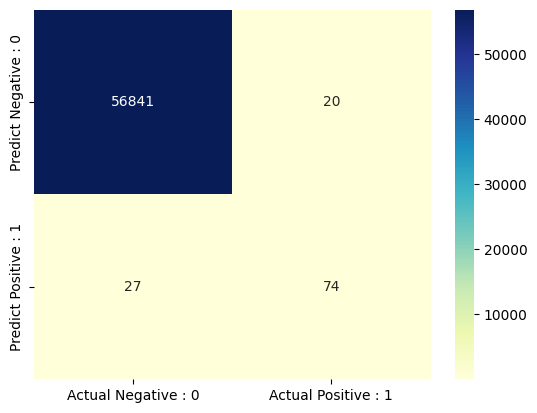

In [5]:
# visualize confusion matrix with seaborn heatmap
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative : 0', 'Actual Positive : 1'],
                                 index=['Predict Negative : 0', 'Predict Positive : 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.73      0.76       101

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962

